In [ ]:
!pip install TableOne

In [ ]:
!pip install numpy 

In [1]:
import pandas as pd
import numpy as np
from tableone import TableOne

In [4]:
df = pd.read_csv('post_op_synthetic.csv', delimiter=';')
df.shape

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10000, 50)

In [5]:
df.columns

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['AkuttHel', 'AkuttDag', 'AkuttPK', 'ElHel', 'ElDag', 'ElPK', 'LoS',
       'DtOp', 'innmateHast', 'ICD10kap', 'Kjonn', 'Alder',
       'Operasjonsavdeling', 'ASA_previsitt', 'Smitte', 'Ukedag',
       'Ventetid_dager', 'HastegradGrp', 'Opkategori', 'Postop',
       'PlanlagtKnivtid', 'StuetidStart', 'AnestesiStart', 'KlartForOperasjon',
       'KnivtidStart', 'KnivtidSlutt', 'StuetidSlutt',
       'TryggKirurgi_Forberedelsessjekk', 'TryggKirurgi_Timeout',
       'TryggKirurgi_Avslutnsjekk', 'Postop_Intensiv', 'Postop_Actilyse',
       'Postop_Traume', 'BMI_gruppe', 'HarMemo', 'ASA', 'HarAntibiotika',
       'Alvorlighet', 'Varighet', 'LavestSystBT', 'LavestSystBT_NI',
       'HøyestSystBT', 'HøyestSystBT_NI', 'TempTatt', 'Intubert',
       'ProblemkodeGrp', 'HovedInngrepGrp', 'Undergruppe_operasjonskorGrp',
       'AnestesiGrp', 'Target'],
      dtype='object')

In [6]:
# list of columns to be included in Table 1
columns_to_include = ['DtOp', 'ICD10kap', 'ASA_previsitt', 'Target', 'Opkategori', 'Kjonn', 'Alder','LoS','TempTatt', 'TryggKirurgi_Forberedelsessjekk', 'TryggKirurgi_Timeout', 'TryggKirurgi_Avslutnsjekk']

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# list of columns containing categorical variables
categorical = ['ASA_previsitt', 'ICD10kap', 'Target', 'TempTatt', 'TryggKirurgi_Forberedelsessjekk','TryggKirurgi_Timeout', 'TryggKirurgi_Avslutnsjekk', 'Kjonn']

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# categorical variable for stratification
groupby = ['Opkategori']

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# list of non-normal variables
nonnormal = ['DtOp', 'Alder', 'LoS']

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# dictionary of alternative labels:
labels={'Opkategori': 'Emergency or Planned operation', 'LoS': 'length of stay', 'Alder': 'age', 'Kjonn': 'gender', 'TryggKirurgi_Forberedelsessjekk' : 'Checklist prior to surgery completed',
       'TryggKirurgi_Timeout':'Checklist during surgery completed', 'TryggKirurgi_Avslutnsjekk': 'Checklist after surgery completed'}

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Create an instance of TableOne with the input arguments
mytable = TableOne(df, columns=columns_to_include, categorical=categorical, groupby=groupby, nonnormal=nonnormal, rename=labels, pval=False)

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Display the table using the tabulate method. 
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒═════════════════════════════════════════════╤═════════╤═══════════╤══════════════════╤══════════════════╤══════════════════╕
│                                             │         │ Missing   │ Overall          │ Elektiv          │ ØH               │
╞═════════════════════════════════════════════╪═════════╪═══════════╪══════════════════╪══════════════════╪══════════════════╡
│ n                                           │         │           │ 10000            │ 4613             │ 5387             │
├─────────────────────────────────────────────┼─────────┼───────────┼──────────────────┼──────────────────┼──────────────────┤
│ DtOp, median [Q1,Q3]                        │         │ 0         │ 0.0 [0.0,0.0]    │ 0.0 [0.0,0.0]    │ 0.0 [0.0,1.0]    │
├─────────────────────────────────────────────┼─────────┼───────────┼──────────────────┼──────────────────┼──────────────────┤
│ ICD10kap, n (%)                             │ A       │ 0         │ 14 (0.1)         │ 9 (0.2)          │ 5 (

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
mytable.to_html('./Documents/table1_by_Kjonn.html')


c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
pip install pandas scikit-learn


c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
df = pd.read_csv('post_op_synthetic.csv', delimiter=';')

# Define the columns to include in the model
columns_to_include = ['DtOp', 'ICD10kap', 'ASA_previsitt', 'Target', 'Opkategori', 'Kjonn', 'Alder', 'LoS', 'TempTatt', 'TryggKirurgi_Forberedelsessjekk', 'TryggKirurgi_Timeout', 'TryggKirurgi_Avslutnsjekk']

# Filter the dataframe to include only these columns
df = df[columns_to_include]

# For simplicity, use median for numerical and mode for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


# Ensure 'Opkategori' is included in the list of categorical columns
categorical = ['ASA_previsitt', 'ICD10kap', 'Target', 'TempTatt', 'TryggKirurgi_Forberedelsessjekk', 'TryggKirurgi_Timeout', 'TryggKirurgi_Avslutnsjekk', 'Kjonn', 'Opkategori']  # Add 'Opkategori'

numerical = [col for col in columns_to_include if col not in categorical and col != 'LoS']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline that combines the preprocessor with the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Define the target variable and features
X = df.drop('LoS', axis=1)
y = df['LoS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optional: further adjust the model, feature selection, or preprocessing based on initial results


c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Miniconda\envs\py38_default\lib\site-packages\sklearn\utils\multiclass.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
c:\Miniconda\envs\py38_default\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and

Mean Squared Error: 96.6449340883221


c:\Miniconda\envs\py38_default\lib\site-packages\sklearn\preprocessing\_encoders.py:104: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
c:\Miniconda\envs\py38_default\lib\site-packages\sklearn\preprocessing\_encoders.py:105: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20;

c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Miniconda\envs\py38_default\lib\site-packages\sklearn\preprocessing\_encoders.py:104: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.in

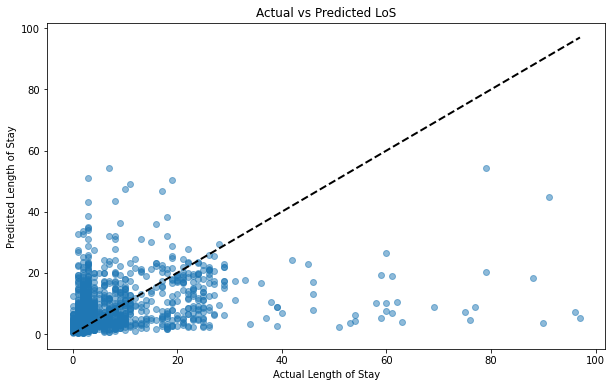

In [16]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted LoS')
plt.xlabel('Actual Length of Stay')
plt.ylabel('Predicted Length of Stay')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()


This model is a RandomForestRegressor designed to predict the Length of Stay (LoS) in a hospital post-operation. It employs a mix of preprocessing techniques, including one-hot encoding for categorical variables and standard scaling for numerical variables. The model's performance is visualized by comparing its predictions against actual LoS values, providing an intuitive understanding of its accuracy.







c:\Miniconda\envs\py38_default\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


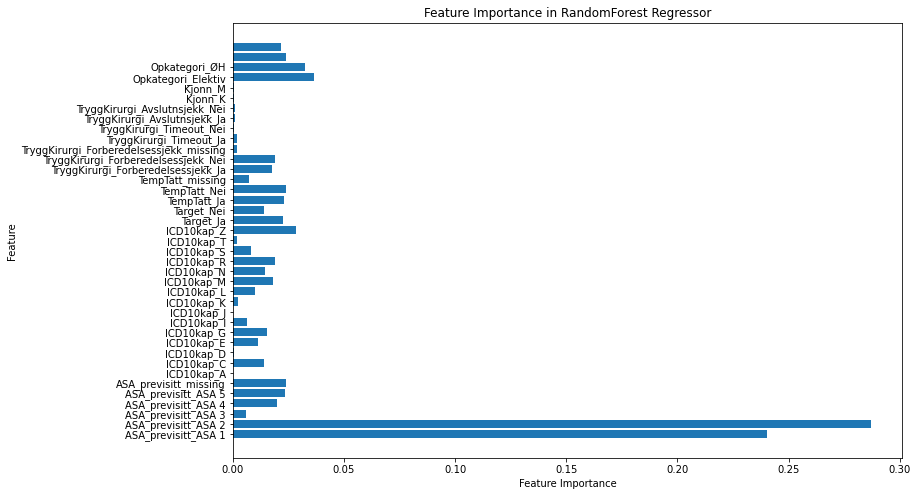

In [17]:
import matplotlib.pyplot as plt

# After fitting the model
feature_importances = pipeline.named_steps['model'].feature_importances_
# Get feature names after one-hot encoding
feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names(categorical)

# Creating a bar plot
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in RandomForest Regressor')
plt.show()
